In [1]:
#Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
#Cargamos el dataset y dividimos entre train y test
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
from sklearn.model_selection import train_test_split
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos el train y el test en respectivos csv y despues 
#cargamos el train en un nuevo dataframe que es el que manipularemos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)
df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [3]:
df_train.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
...,...,...,...,...,...
Cancellation Policy,moderate,flexible,moderate,strict,strict
Calculated host listings count,2,1,16,97,2
Reviews per Month,0.5,2.43,NaN,NaN,2.08
Geolocation,"40.4077318793,-3.68481869733","40.4158022422,-3.70534037765","40.3890481626,-3.74037392557","40.4128140929,-3.70305247638","40.4386311984,-3.71371613279"


In [4]:
#Como primer paso, vamos a eliminar del dataframe todas aquellas caracteristicas que corresponden a un texto
#Para ello vamos a eliminar todas las columnas que tengan alguna entrada mayor a 25 caracteres
delete_columns = df_train.select_dtypes(['object']).applymap(lambda x: len(str(x)) > 25).any(axis=0)
delete = delete_columns[delete_columns[:]==True]
delete = delete.axes[0].tolist()

print(f"En valor absoluto hemos quitado {len(delete)} columnas de {df_train.shape[1]}")
print(f"En valor relativo hemos quitado un {round((len(delete))*100/df_train.shape[1],2)} % de las columnas")

df_train = df_train.drop(columns=delete)

En valor absoluto hemos quitado 34 columnas de 89
En valor relativo hemos quitado un 38.2 % de las columnas


In [5]:
# LAS FECHAS POR AHORA LAS VAMOS A DEJAR FUERA, ASI QUE LAS ELIMINO DEL DATAFRAME
df_train = df_train.drop(columns=["Last Scraped","Host Since", "Calendar Updated","Calendar last Scraped", "First Review", "Last Review" ])

In [6]:
#Ahora vamos a deshacernos de algunas columnas que a simple vista no son relevantes (ID, Scrape ID, Host ID...)
borrar_columnas = ["ID","Scrape ID", "Host ID","Latitude","Longitude"]
size_train = df_train.shape[1]
df_train= df_train.drop(columns=borrar_columnas)
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")

En valor absoluto hemos quitado 5 columnas de 49 quedando así 44 columnas
En valor relativo hemos quitado un 10.2 % de las columnas


Text(0.5, 0, 'Price')

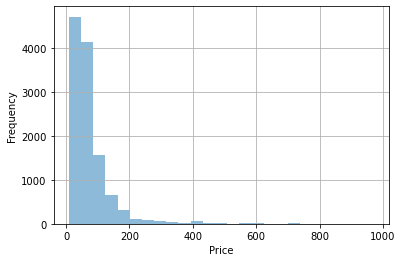

In [7]:
#Observamos outliers en el precio para intentar descartar filas poco representativas
df_train['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

In [8]:
len(df_train[df_train['Price']>200])/len(df_train)

0.03924221921515562

In [9]:
#Nos deshacemos de las filas con precios mayores a 200
df_train = df_train[df_train['Price'] < 200]

In [10]:
#Vamos a ver las columnas que tinen mas de un 60% de NA para ver si nos deshacemos de ellas
df_train.isnull().sum()> round(0.7*df_train.shape[0])

Experiences Offered               False
Host Response Time                False
Host Response Rate                False
Host Acceptance Rate               True
Host Listings Count               False
Host Total Listings Count         False
Neighbourhood Group Cleansed      False
Zipcode                           False
Market                            False
Country Code                      False
Country                           False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Square Feet                        True
Price                             False
Weekly Price                       True
Monthly Price                      True
Security Deposit                  False
Cleaning Fee                      False
Guests Included                   False


In [11]:
 #Quitamos columnas con alto porcentaje de Na's
borrar_columnas = ["Host Acceptance Rate","Square Feet", "Weekly Price","Monthly Price","Has Availability"]
size_train = df_train.shape[1]
df_train= df_train.drop(columns=borrar_columnas)
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")

En valor absoluto hemos quitado 5 columnas de 44 quedando así 39 columnas
En valor relativo hemos quitado un 11.36 % de las columnas


In [12]:
# El siguiente paso sera codificar las columnas de tipo "object"
df_train.select_dtypes("object").nunique()

Experiences Offered               5
Host Response Time                4
Neighbourhood Group Cleansed     46
Zipcode                         489
Market                           38
Country Code                     16
Country                          15
Property Type                    21
Room Type                         3
Bed Type                          5
Cancellation Policy               8
dtype: int64

In [13]:
#Vamos a realizar "target encoding" para dar valor a las variables de tipo object
means_1 = df_train.groupby('Cancellation Policy')['Price'].mean()
means_2 = df_train.groupby('Bed Type')['Price'].mean()
means_3 = df_train.groupby('Room Type')['Price'].mean()
means_4 = df_train.groupby('Property Type')['Price'].mean()
means_5 = df_train.groupby('Country')['Price'].mean()
means_6 = df_train.groupby('Country Code')['Price'].mean()
means_7 = df_train.groupby('Market')['Price'].mean()
means_8 = df_train.groupby('Zipcode')['Price'].mean()
means_9 = df_train.groupby('Neighbourhood Group Cleansed')['Price'].mean()
means_10 = df_train.groupby('Host Response Time')['Price'].mean()
means_11 = df_train.groupby('Experiences Offered')['Price'].mean()


#Sustituimos los caracteres por los valores de la media
df_train['Cancellation Policy'] = df_train['Cancellation Policy'].map(means_1)
df_train['Bed Type'] = df_train['Bed Type'].map(means_2)
df_train['Room Type'] = df_train['Room Type'].map(means_3)
df_train['Property Type'] = df_train['Property Type'].map(means_4)
df_train['Country'] = df_train['Country'].map(means_5)
df_train['Country Code'] = df_train['Country Code'].map(means_6)
df_train['Market'] = df_train['Market'].map(means_7)
df_train['Zipcode'] = df_train['Zipcode'].map(means_8)
df_train['Neighbourhood Group Cleansed'] = df_train['Neighbourhood Group Cleansed'].map(means_9)
df_train['Host Response Time'] = df_train['Host Response Time'].map(means_10)
df_train['Experiences Offered'] = df_train['Experiences Offered'].map(means_11)


In [14]:
#Ahora que ya tenemos todo valores numericos, vamos a tratar con los valores NA
#Vamos a ver las diferentes columnas para ver como proceder
df_train.columns

Index(['Experiences Offered', 'Host Response Time', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count',
       'Neighbourhood Group Cleansed', 'Zipcode', 'Market', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [15]:
#Vamos a ver la correspondencia de cada una de las variables categoricas con sus valores, para ver luego como rellenar los NA
print(means_1)
print("\n")
print(means_2)
print("\n")
print(means_3)
print("\n")
print(means_4)
print("\n")
print(means_5)
print("\n")
print(means_6)
print("\n")
print(means_7)
print("\n")
print(means_8)
print("\n")
print(means_9)
print("\n")
print(means_10)
print("\n")
print(means_11)


Cancellation Policy
flexible           53.266667
flexible_new       89.615385
moderate           61.210130
moderate_new       69.588235
strict             69.808071
strict_new         82.296296
super_strict_30    95.882353
super_strict_60    88.235294
Name: Price, dtype: float64


Bed Type
Airbed           54.400000
Couch            46.875000
Futon            43.222222
Pull-out Sofa    55.758794
Real Bed         62.303110
Name: Price, dtype: float64


Room Type
Entire home/apt    81.273348
Private room       34.014800
Shared room        25.607595
Name: Price, dtype: float64


Property Type
Apartment              62.991772
Bed & Breakfast        36.724265
Boat                  102.000000
Boutique hotel         68.000000
Bungalow               56.000000
Camper/RV              35.666667
Casa particular        31.666667
Chalet                 67.650000
Condominium            60.185455
Dorm                   36.805556
Earth House            20.500000
Guest suite            20.500000
Guestho

In [16]:
#Miramos cada una y la modificamos por el valor mas apropiado
#Primero miramos las variables categoricas recient transformadas

#Como sabemos que en Market principalmente tratamos madrid, y en country tratamos principalmente España
#podemos aplicar de nuevo la moda para sustituir a los NA's
df_train["Market"].fillna(df_train["Market"].mode(), inplace=True)
df_train["Country"].fillna(df_train["Country"].mode(), inplace=True)
df_train["Country Code"].fillna(df_train["Country Code"].mode(), inplace=True)

#En experiences Offered asumimos que si es NA es que el valor es none
df_train["Experiences Offered"].fillna(73.60, inplace=True)

In [17]:
#Ahora vamos a sustituir aquellos valores inicialmente numericos en los que un NA corresponde a un valor de cero
df_train["Security Deposit"].fillna(value=0, inplace=True)
df_train["Cleaning Fee"].fillna(value=0, inplace=True)
df_train["Guests Included"].fillna(value=0, inplace=True)
df_train["Extra People"].fillna(value=0, inplace=True)
df_train["Minimum Nights"].fillna(value=0, inplace=True)

In [18]:
#Todos los valores restantes les otorgaremos el valor de la media
df_train.fillna(df_train.mean()[0], inplace=True)

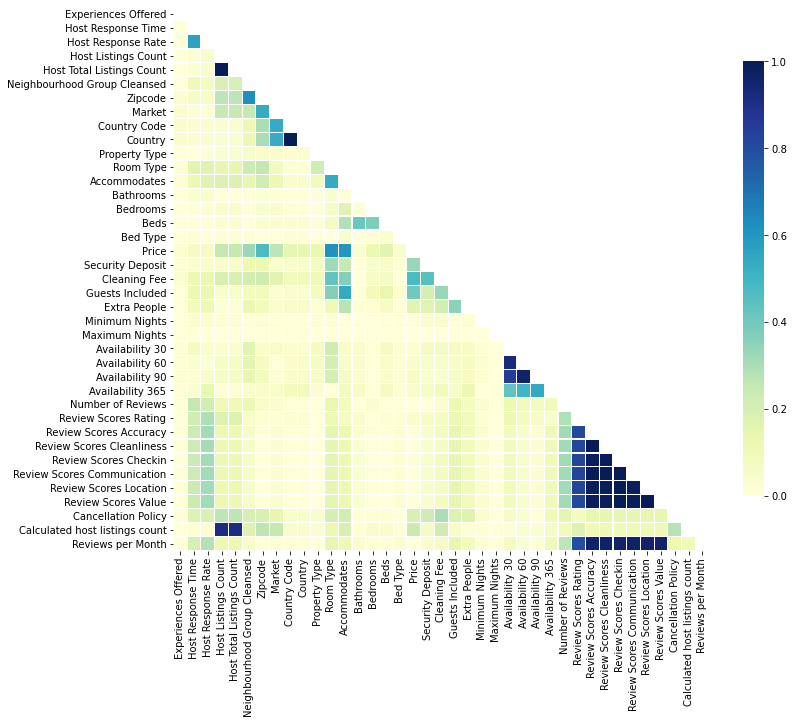

In [19]:
#Ahora vamos a echar un vistazo a la matriz de correlacion para deshacernos de variables con alta dependencia lineal

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


In [20]:
#Nos ayudamos de grafico y tabla para detectar mejor aquellos que tienen una correlacion mayor al 85%
#Vamos a considerar alta dependencia lineal a aquellas caracteristica que tengan un valor mayor a 0.85
corr>0.85

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Group Cleansed,Zipcode,Market,Country Code,Country,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
Experiences Offered,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Host Response Time,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Host Response Rate,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Host Listings Count,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Host Total Listings Count,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Neighbourhood Group Cleansed,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Zipcode,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Market,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Country Code,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
Country,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [21]:
#Hacemos zoom en la region baja de la tabla, donde parece haber alta correlación, para sí ver mejor
df_train.iloc[:,33:].corr()>0.85

,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
Review Scores Communication,True,True,True,False,False,True
Review Scores Location,True,True,True,False,False,True
Review Scores Value,True,True,True,False,False,True
Cancellation Policy,False,False,False,True,False,False
Calculated host listings count,False,False,False,False,True,False
Reviews per Month,True,True,True,False,False,True


In [22]:
# Nos desacemos de todas aquellas variables que tienen una altacorrelacion entre si y nos quedamos solo con una de cada
size_train = df_train.shape[1]
df_train = df_train.drop(columns=["Review Scores Cleanliness","Review Scores Checkin","Review Scores Accuracy", "Review Scores Location", "Review Scores Communication", "Reviews per Month","Country","Availability 60", "Availability 90", "Calculated host listings count","Host Total Listings Count"])
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")

En valor absoluto hemos quitado 11 columnas de 39 quedando así 28 columnas
En valor relativo hemos quitado un 28.21 % de las columnas


In [23]:
#Intuimos que bathrooms y bedrooms tiene sentido unirlas en una variable para ver su relacion
#Antes de unirlas, vamos a deshacernos de los outliers en Bathrooms y en Bedrooms

Text(0.5, 0, 'Bathrooms')

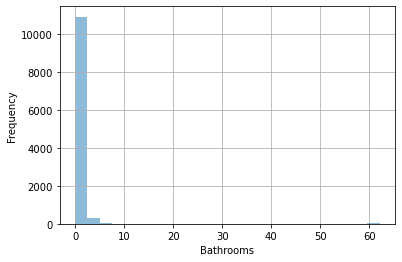

In [24]:
df_train['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

In [25]:
df_train['Bathrooms'].unique()

array([ 1.        ,  1.5       ,  3.        ,  2.        , 62.10146212,
        0.5       ,  4.        ,  0.        ,  2.5       ,  5.5       ,
        6.        ,  5.        ,  4.5       ,  3.5       ,  8.        ,
        7.        ])

In [26]:
len(df_train[df_train['Bathrooms']<1])/len(df_train)

0.009658839167035888

In [27]:
#Nos deshacemos de todas las filas con menos de un baño ya que es un valor que no tiene sentido y puede no generalizar bien
df_train = df_train[df_train['Bathrooms'] >= 1]

In [28]:
len(df_train[df_train['Bathrooms']<5])/len(df_train)

0.9917680744452398

In [29]:
#Nos deshacemos de todas las columnas con más de cinco baños
df_train = df_train[df_train['Bathrooms'] < 5]

Text(0.5, 0, 'Bedrooms')

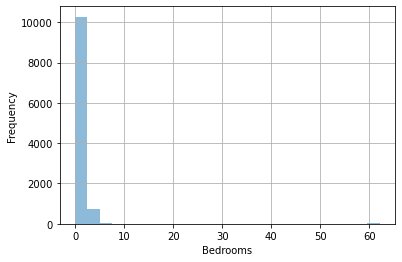

In [30]:
#Ahora vamos a ver como se distribuyen las habitaciones
df_train['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

In [31]:
df_train['Bedrooms'].unique()

array([ 1.        ,  2.        ,  0.        ,  6.        ,  4.        ,
        3.        ,  5.        , 62.10146212])

In [32]:
len(df_train[(df_train['Bedrooms'] < 6)])/len(df_train)

0.9973836160230963

In [33]:
#Nos deshacemos de todas las columnas con más de seis habitaciones
df_train = df_train[df_train['Bedrooms'] < 6]

In [34]:
df_train["Bath_Bedroom"] = pd.DataFrame(df_train["Bathrooms"]*df_train["Bedrooms"])

In [35]:
df_train["Bath_Bedroom"].unique()

array([ 1. ,  1.5,  3. ,  4. ,  2. ,  0. ,  8. ,  9. ,  6. , 12. ,  4.5,
        5. ,  2.5, 10. , 16. ,  7.5, 20. , 15. , 17.5, 10.5, 14. , 12.5,
        3.5])

In [36]:
#Ahora estamos listos para crear un modelo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

#Separamos X de y

from sklearn import preprocessing
data = df_train.values
price_pos = df_train.columns.get_loc("Price")
y_train = data[:,price_pos]     # nos quedamos con la 1ª columna, price
X_train = data[:,0:]     # nos quedamos con el resto
X_train = np.delete(X_train, price_pos, 1)
feature_names = df_train.columns[0:].drop("Price")
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [37]:
#Almacenamos las columnas de X para luego identificarlas
feature_names.tolist()

['Experiences Offered',
 'Host Response Time',
 'Host Response Rate',
 'Host Listings Count',
 'Neighbourhood Group Cleansed',
 'Zipcode',
 'Market',
 'Country Code',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Value',
 'Cancellation Policy',
 'Bath_Bedroom']

In [38]:
#Cargamos todas las librerias que vamos a necesitar
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
import statistics as st

In [39]:
#Hacemos seleccion de caracteristicas fijandonos en el mse y con el metodo de seleccion hacia delante
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

feature_ranking =[]
mse =[]
mse_list=[]
for j in range(X_train.shape[1]):
    #if j == 1:
     #   break
    
    best_score = 100000
    score=[]
    for i in range(X_train.shape[1]):
      #  if i ==1:
       #     break
            
        reg = KFold(n_splits=5, shuffle = True)
        mse = []
        for train, validation in reg.split(X_train):

            if i in feature_ranking:
                a = True
                break
                
            if j == 0:

                X_val = X_train[validation,i].reshape(-1,1) 
                X_CV = X_train[train,i].reshape(-1,1)
                a =False
                
            if j>0:
                a=False

                idx = feature_ranking
                
                X_CV = np.concatenate((X_train[train,i].reshape(-1,1), X_train[np.ix_(train,idx)].reshape(len(train),len(idx))),axis=1)
                X_val = np.concatenate((X_train[validation,i].reshape(-1,1), X_train[np.ix_(validation,idx)].reshape(len(validation),len(idx))),axis=1) 
                
            y_val = y_train[validation].reshape(-1,1)
            y_CV= y_train[train].reshape(-1,1)     
  
            LR = LinearRegression().fit(X_CV,y_CV)
            y_hat = LR.predict(X_val)
            mse.append(np.mean((y_val.reshape(-1,1)-y_hat)**2))
            
            
         
        if a == True:
            continue
        else:    
            score.append(st.mean(mse))

        
        if score[-1] < best_score-1:
            best_feature = i
            best_score = score[-1]
        
    print(f"Añadimos a la lista:{feature_names[best_feature]}") 
    feature_ranking.append(best_feature)
    mse_list.append(best_score)

Añadimos a la lista:Room Type
Añadimos a la lista:Bath_Bedroom
Añadimos a la lista:Zipcode
Añadimos a la lista:Cleaning Fee
Añadimos a la lista:Accommodates
Añadimos a la lista:Country Code
Añadimos a la lista:Availability 30
Añadimos a la lista:Number of Reviews
Añadimos a la lista:Market
Añadimos a la lista:Host Listings Count
Añadimos a la lista:Host Response Rate
Añadimos a la lista:Neighbourhood Group Cleansed
Añadimos a la lista:Bedrooms
Añadimos a la lista:Security Deposit
Añadimos a la lista:Guests Included
Añadimos a la lista:Review Scores Value
Añadimos a la lista:Review Scores Rating
Añadimos a la lista:Extra People
Añadimos a la lista:Experiences Offered
Añadimos a la lista:Availability 365
Añadimos a la lista:Bed Type
Añadimos a la lista:Cancellation Policy
Añadimos a la lista:Host Response Time
Añadimos a la lista:Bathrooms
Añadimos a la lista:Minimum Nights
Añadimos a la lista:Property Type
Añadimos a la lista:Beds
Añadimos a la lista:Maximum Nights


(0.0, 28.0, 450.0, 600.0)

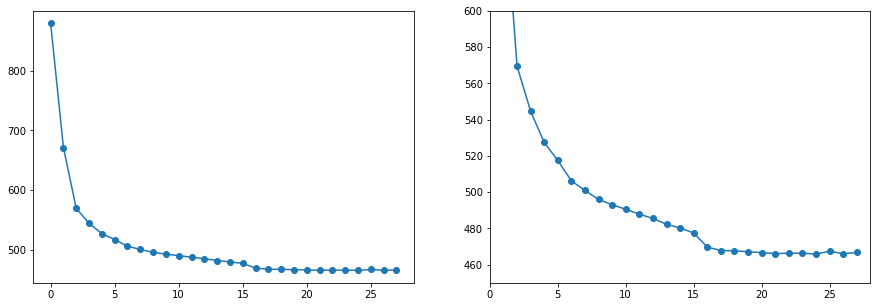

In [40]:
plt.figure(figsize=(15, 5))  
plt.subplot(1,2,1)
plt.scatter(list(range(X_train.shape[1])),mse_list)
plt.plot(list(range(X_train.shape[1])),mse_list)
#plt.axis([0, X_train.shape[1], 0, 5])

plt.subplot(1,2,2)
plt.scatter(list(range(X_train.shape[1])),mse_list)
plt.plot(list(range(X_train.shape[1])),mse_list)
plt.axis([0, X_train.shape[1], 450, 600])


In [41]:
# Cogemos 17 caracteristicas ya que parecen dar un buen resultado
feature_ranking[:17]

[9, 27, 5, 16, 10, 7, 21, 23, 6, 3, 2, 4, 12, 15, 17, 25, 24]

In [42]:
#Entrenamos el modelo probando diferentes valores de alpha y de grado del polinomio
alpha_vector = np.logspace(-5,4,20)
degree_vector = [1,2,3]#np.linspace(1,3,3)

param_grid = {'poly__degree':degree_vector,'model__alpha': alpha_vector}
steps = [
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
]

pipeline = Pipeline(steps)


grid = GridSearchCV(pipeline, scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose = 3,n_jobs =6)
grid.fit(X_train[:,feature_ranking[:19]], y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:   25.4s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:   28.4s finished


best mean cross-validation score: -387.862
best parameters: {'model__alpha': 127.42749857031322, 'poly__degree': 2}


In [43]:
#Ahora vamos a comparar el modelo entrenado con los valores de test 

In [44]:
#Preparamos la matriz de test
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

df_test = df_test[df_test['Bathrooms'] >= 1]
df_test = df_test[df_test['Bedrooms'] < 6]
df_test = df_test[df_test['Bathrooms'] < 5]
df_test["Bath_Bedroom"] = pd.DataFrame(df_test["Bathrooms"]*df_test["Bedrooms"])

df_test_X = df_test[feature_names]
df_test_X["Price"] = df_test["Price"]

<ipython-input-44-27a98a3d96f7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_X["Price"] = df_test["Price"]


In [45]:
#vamos a quietar los ouliers en el precio de los apartamentos tambien en test
df_test_X = df_test_X[df_test_X['Price'] < 200]

In [46]:
#Categorizo las variables tipo objeto
means_1 = df_train.groupby('Cancellation Policy')['Price'].mean()
means_2 = df_test_X.groupby('Bed Type')['Price'].mean()
means_3 = df_test_X.groupby('Room Type')['Price'].mean()
means_4 = df_test_X.groupby('Property Type')['Price'].mean()
means_5 = df_test_X.groupby('Country Code')['Price'].mean()
means_6 = df_test_X.groupby('Market')['Price'].mean()
means_7 = df_test_X.groupby('Zipcode')['Price'].mean()
means_8 = df_test_X.groupby('Neighbourhood Group Cleansed')['Price'].mean()
means_9 = df_test_X.groupby('Host Response Time')['Price'].mean()
means_10 = df_test_X.groupby('Experiences Offered')['Price'].mean()

df_test_X['Cancellation Policy'] = df_test_X['Cancellation Policy'].map(means_1)
df_test_X['Bed Type'] = df_test_X['Bed Type'].map(means_2)
df_test_X['Room Type'] = df_test_X['Room Type'].map(means_3)
df_test_X['Property Type'] = df_test_X['Property Type'].map(means_4)
df_test_X['Country Code'] = df_test_X['Country Code'].map(means_5)
df_test_X['Market'] = df_test_X['Market'].map(means_6)
df_test_X['Zipcode'] = df_test_X['Zipcode'].map(means_7)
df_test_X['Neighbourhood Group Cleansed'] = df_test_X['Neighbourhood Group Cleansed'].map(means_8)
df_test_X['Host Response Time'] = df_test_X['Host Response Time'].map(means_9)
df_test_X['Experiences Offered'] = df_test_X['Experiences Offered'].map(means_10)

In [47]:
# Me deshago de los valores Na sustituyendo como antes

df_test_X["Country Code"].fillna(df_test_X["Country Code"].mode(), inplace=True)
df_test_X["Market"].fillna(df_test_X["Market"].mode(), inplace=True)
df_test_X["Experiences Offered"].fillna(73.60, inplace=True)
df_test_X["Security Deposit"].fillna(value=0, inplace=True)
df_test_X["Cleaning Fee"].fillna(value=0, inplace=True)
df_test_X["Guests Included"].fillna(value=0, inplace=True)
df_test_X["Extra People"].fillna(value=0, inplace=True)
df_test_X["Minimum Nights"].fillna(value=0, inplace=True)
df_test_X.fillna(df_test_X.mean()[0], inplace=True)

In [48]:
#Preparamos las matrices para introducirlas en el modelo de regresion polinomica
columns = feature_names[feature_ranking[:19]].tolist()
y_test = df_test_X.iloc[:,df_test_X.columns.get_loc("Price")].values
df_test_X = df_test_X.drop("Price",axis=1)
X_test = df_test_X[columns].values

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [49]:
#Vamos a compar el test con el train
y_hat = grid.predict(X_test)
mse = np.mean((y_test-y_hat)**2)
r2 = r2_score(y_test, y_hat)

Text(0, 0.5, 'Real_price')

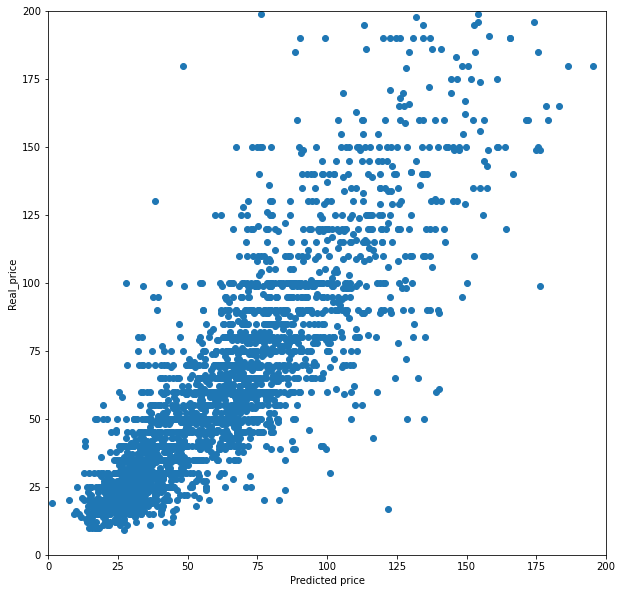

In [50]:
plt.figure(figsize=(10, 10))  
plt.scatter(y_hat,y_test)
plt.axis([0, 200, 0, 200])
plt.xlabel('Predicted price')
plt.ylabel('Real_price')

In [51]:
mse

386.0961014288031

In [52]:
r2

0.7265939279879173